<a href="https://colab.research.google.com/github/paulrobustelli/Chem6_Lab_PythonCode/blob/main/CHEM6_Lab1_Prelab_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# C6 Week 1 Prelab — Chemical Kinetics (Python walkthrough)

We will:
1. Rank the expected initial rates for runs (i)-(v) assuming first order in each reactant.
2. Use the provided A565 vs time data (run i) to test 0th/1st/2nd order behavior for [I2 + I3-].
3. Use the (zero-order in iodine) rate law to determine correct units for k and k'.



## Absorbance and Concentration

The absorbance at 565 nm is related to concentration by the Beer-Lambert Law:

$$
A = \varepsilon c l
$$

where  
- $A$ is the measured absorbance,  
- $\varepsilon$ is the molar absorptivity of the absorbing species,  
- $c$ is the concentration of the absorbing species, and  
- $l$ is the path length of the cuvette.

At 565 nm, the absorbance arises from iodine and triiodide in solution.
Because $\varepsilon$ and $l$ are constant for a given experiment,

$$
A_{565} \propto [\mathrm{I_2}] + [\mathrm{I_3^-}]
$$

Thus, the measured absorbance $A_{565}$ can be used as a direct proxy for
the concentration of iodine-containing species in kinetic analyses.


**Here is an example of code to plot data - the same way we would do in excell or google sheets.**

In python, instead of using cells, we put data in objects called arrays. We use the package numpy (for numerical python) to hold the data in arrays. You can think of each of these arrays as representing one column from the above spreadsheet screenshot.

We first import the numpy package and use the shorthand "np" as the name of package with the line:

import numpy as np

Then we're going to make two arrays with the desired values:

time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])

absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193, 0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

Then we use the print function to check that we have the correct values in the arrays.

**To run a cell of code you need hold the "shift" key and hit enter**



[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[0.3   0.287 0.274 0.26  0.247 0.233 0.22  0.206 0.193 0.179 0.166 0.152
 0.139 0.125 0.112 0.098 0.085]


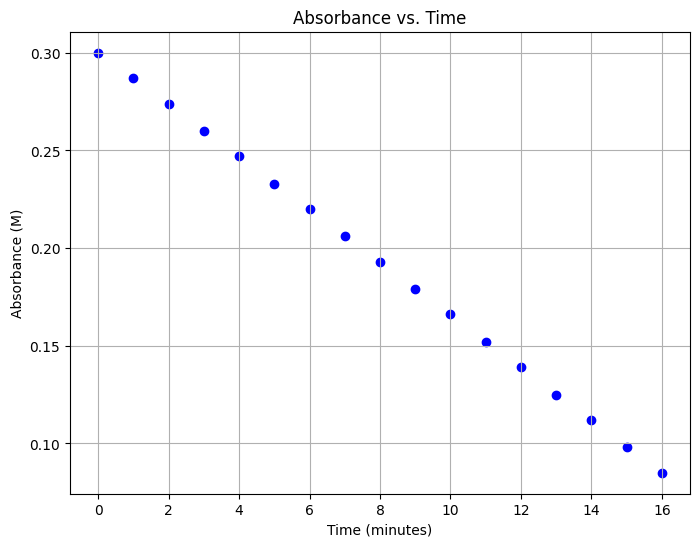

In [3]:
import matplotlib.pyplot as plt


time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

print(time)
print(absorbance)
# Plot the data
plt.figure(figsize=(8, 6))  # Adjust figure size for better viewing
plt.scatter(time, absorbance, marker='o', linestyle='-', color='blue')
plt.xlabel("Time (minutes)")
plt.ylabel("Absorbance (M)")
plt.title("Absorbance vs. Time")
plt.grid(True)
plt.show()

**Now lets look at some code that uses a standard pythong function from the python package scipy  (scientific pythong)**

The function we are going to use is called "linregress".  Here is the documentation:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

**To run the cell of code below you need hold the "shift" key and hit enter**

This cell is going to plot the data (Absorbanc) - run a linear fit, report the slope, intercept, and the coefficient of determination ($r^2$). For a linear fit, $r^2$ is the square of a correlation coefficient.

Then we're going to calculate the residuals (the difference between the fit and the data for each data point) and plot the residuals

Slope: -0.013480392156862746
Intercept: 0.30054901960784314
R-squared: 0.9999814879460085
Residuals: [-5.49019608e-04 -6.86274510e-05  4.11764706e-04 -1.07843137e-04
  3.72549020e-04 -1.47058824e-04  3.33333333e-04 -1.86274510e-04
  2.94117647e-04 -2.25490196e-04  2.54901961e-04 -2.64705882e-04
  2.15686275e-04 -3.03921569e-04  1.76470588e-04 -3.43137255e-04
  1.37254902e-04]


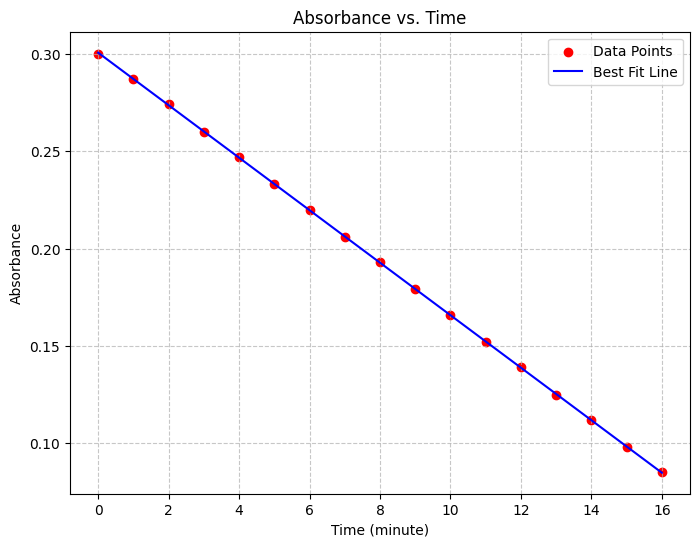

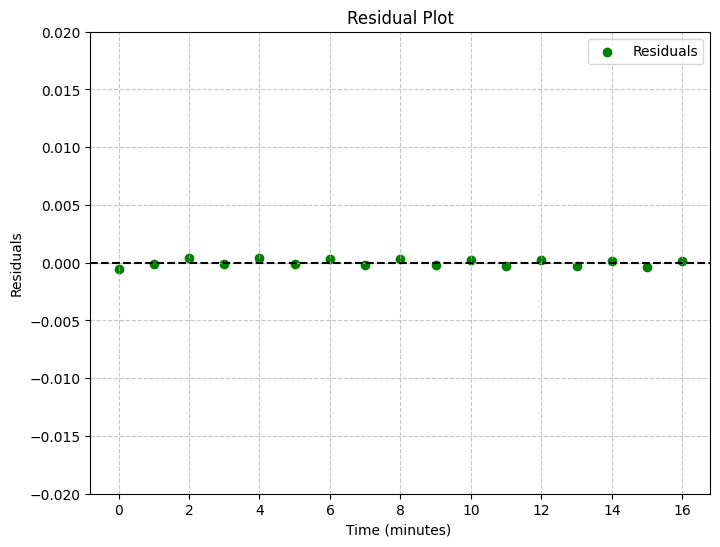

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

time = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
absorbance = np.array([0.30, 0.287, 0.274, 0.260, 0.247, 0.233, 0.220, 0.206, 0.193,
                       0.179, 0.166, 0.152, 0.139, 0.125, 0.112, 0.098, 0.085])

# Calculate the linear regression (best fit line)
slope, intercept, r_value, p_value, std_err = linregress(time, absorbance)

# Create the best fit line
best_fit_line = slope * time + intercept

# Calculate residuals
residuals = absorbance - best_fit_line

# Print the regression results and residuals
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)
print("Residuals:", residuals)

# Plot the original data and the best fit line
plt.figure(figsize=(8, 6))
plt.scatter(time, absorbance, marker='o', color='red', label="Data Points")
plt.plot(time, best_fit_line, color='blue', label="Best Fit Line")

# Add labels and title
plt.xlabel("Time (minute)")
plt.ylabel("Absorbance")
plt.title("Absorbance vs. Time")
plt.legend()

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(time, residuals, color='green', label="Residuals")
plt.axhline(y=0, color='black', linestyle='--') # Add a horizontal line at y=0 for reference
plt.xlabel("Time (minutes) ")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(-0.02, 0.02)  # Set x-axis limits
plt.show()

Okay so lets get to the Lab 1 Prelab exercises

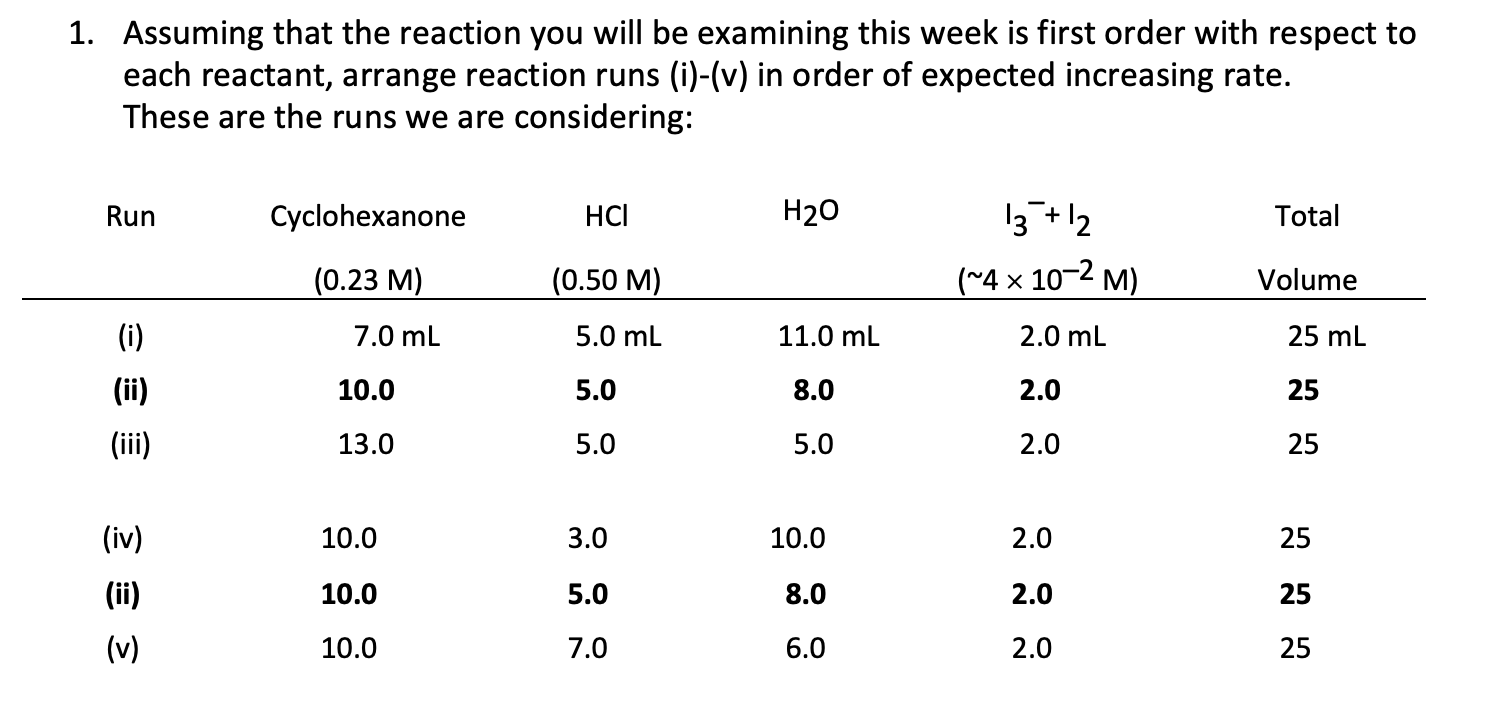

So we're going to need to calculat the conentrations of everything we're interested in from this table.  

Each reaction has a total volume of 25ml = .025 L

Lets convery all of our volumes into L (divide ml by 1000), then compute concentrations using the total volume

In [24]:
import numpy as np

# --- Stock concentrations (M = mol/L) ---
M_cyclo = 0.23          # cyclohexanone
M_hcl   = 0.50          # HCl ≈ [H+]
M_I     = .040          # I2 + I3-

# --- Volumes (L) ---
V_total = 25.0/1000.0      # total volume = 25 mL = 0.025 L

# Run labels
runs = np.array(["i", "ii", "iii", "iv", "v"])

# Volumes added (convert mL → L)
V_cyclo = np.array([7.0, 10.0, 13.0, 10.0, 10.0])/1000.0
V_hcl   = np.array([5.0,  5.0,  5.0,  3.0,  7.0])/1000.0
V_I     = np.array([2.0,  2.0,  2.0,  2.0,  2.0])/1000.0
V_water = np.array([11.0, 8.0,  5.0, 10.0,  6.0])/1000.0

# --- Initial concentrations after mixing ---
cyclo_0 = M_cyclo * V_cyclo / V_total
H_0     = M_hcl   * V_hcl   / V_total
I_0     = M_I     * V_I     / V_total


**:Now here is a function to print out all our concentrations for each reaction**

In [25]:
# --- Lets loop over all the reaction conditions and print out everything of interest #

# We're going to use the function round(), which takes a number and the desired number of decimal places, and omits them if they're 0
for i in range(5):
    print("Run", runs[i])
    print("  [cyclohexanone]_0 =", round(cyclo_0[i], 4), "M")
    print("  [H+]_0            =", round(H_0[i], 4), "M")
    print("  [I2 + I3-]_0      =", round(I_0[i], 4), "M")
    print()



Run i
  [cyclohexanone]_0 = 0.0644 M
  [H+]_0            = 0.1 M
  [I2 + I3-]_0      = 0.0032 M

Run ii
  [cyclohexanone]_0 = 0.092 M
  [H+]_0            = 0.1 M
  [I2 + I3-]_0      = 0.0032 M

Run iii
  [cyclohexanone]_0 = 0.1196 M
  [H+]_0            = 0.1 M
  [I2 + I3-]_0      = 0.0032 M

Run iv
  [cyclohexanone]_0 = 0.092 M
  [H+]_0            = 0.06 M
  [I2 + I3-]_0      = 0.0032 M

Run v
  [cyclohexanone]_0 = 0.092 M
  [H+]_0            = 0.14 M
  [I2 + I3-]_0      = 0.0032 M



**Now lets use fancier code to print out a nicer looking table - dont worry about how this works**
---




In [27]:
# --- Print results ---
print(f"{'run':>3}  {'[cyclo]_0 (M)':>14}  {'[H+]_0 (M)':>12}  {'[I]_0 (M)':>11}")
for r, c, h, i, in zip(runs, cyclo_0, H_0, I_0):
    print(f"{r:>3}  {c:14.5f}  {h:12.5f}  {i:11.6f} ")

run   [cyclo]_0 (M)    [H+]_0 (M)    [I]_0 (M)
  i         0.06440       0.10000     0.003200 
 ii         0.09200       0.10000     0.003200 
iii         0.11960       0.10000     0.003200 
 iv         0.09200       0.06000     0.003200 
  v         0.09200       0.14000     0.003200 


**Lets review the proposed reaction mechanism**
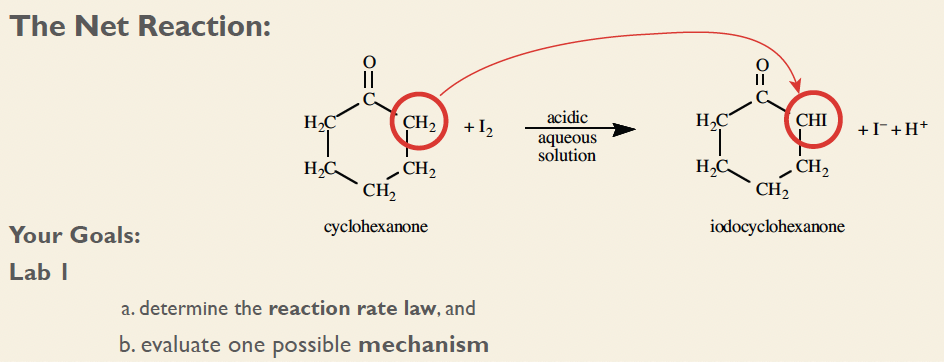

## Kinetics of the Iodination of Cyclohexanone

In this experiment, we study the kinetics of the iodination of cyclohexanone
in acidic aqueous solution. Our goals are to:

- determine the **reaction rate law**, and  
- evaluate one possible **reaction mechanism** consistent with the data.

---

## General Rate Law

Based on the reactants involved, the most general form of the rate law is

$$
\text{Rate} = k \,[\mathrm{H^+}]^{a}\,[\text{cyclohexanone}]^{b}\,[\mathrm{I_2} + \mathrm{I_3^-}]^{c}
$$

where:
- \(k\) is the rate constant,
- \(a\), \(b\), and \(c\) are the reaction orders with respect to each reactant.

These reaction orders **cannot be assumed** and must be **determined experimentally**.

---

## Simplifying the Problem: Pseudo–Rate Law

Because multiple reactant concentrations appear in the rate law, we simplify
the experiment by holding some reactants at effectively constant concentration.

This is done by **flooding the reaction** with a large excess of certain
reactants, so their concentrations do not change appreciably during the experiment.

Under these conditions, the rate law can be rewritten in terms of a
*pseudo rate constant*:

$$
\text{Rate} = k' \,[\mathrm{I_2} + \mathrm{I_3^-}]^{c}
$$

where

$$
k' = k \,[\mathrm{H^+}]^{a}\,[\text{cyclohexanone}]^{b}
$$

---

## Experimental Strategy

1. Measure the concentration of iodine/triiodide as a function of time.
2. Use this data to determine the reaction order \(c\) with respect to iodine.
3. Determine the pseudo rate constant \(k'\).
4. Use known concentrations of \(\mathrm{H^+}\) and cyclohexanone to calculate
   the true rate constant \(k\).

This approach allows us to isolate one variable at a time and greatly
simplifies the kinetic analysis.

## Problem 1: Predict the Relative Rates for Runs (i)–(v)


Now that we have the initial concentrations for each run, we can predict the
**relative initial rates** assuming the reaction is first order with respect
to each reactant.

For a first-order reaction in all reactants:

$$
\text{Rate} \propto [\mathrm{H^+}]\,[\text{cyclohexanone}]\,[\mathrm{I_2 + I_3^-}]
$$

We will compute a **relative rate value** for each run that is proportional
to the true rate. These values are not actual rates — they are only used to
compare runs.

Because the iodine concentration is the same in every run, it does not affect
the ordering, but we include it here for completeness.

In [34]:
# --- Compute relative rates (proportional to the true rate) ---

#Recall we have the concentrations of each reaggant conveniently in our arrays
#We can multiple all the concentrations togeter at the same time like this:
relative_rate = cyclo_0 * H_0 * I_0


#Now lets print our results
for i in range(5):
    print("Run", runs[i])
    print("  [cyclohexanone]_0 =", round(cyclo_0[i], 4), "M")
    print("  [H+]_0            =", round(H_0[i], 4), "M")
    print("  [I2 + I3-]_0      =", round(I_0[i], 4), "M")
    print("  Relative rate     =", round(relative_rate[i], 6))
    print()


Run i
  [cyclohexanone]_0 = 0.0644 M
  [H+]_0            = 0.1 M
  [I2 + I3-]_0      = 0.0032 M
  Relative rate     = 2.1e-05

Run ii
  [cyclohexanone]_0 = 0.092 M
  [H+]_0            = 0.1 M
  [I2 + I3-]_0      = 0.0032 M
  Relative rate     = 2.9e-05

Run iii
  [cyclohexanone]_0 = 0.1196 M
  [H+]_0            = 0.1 M
  [I2 + I3-]_0      = 0.0032 M
  Relative rate     = 3.8e-05

Run iv
  [cyclohexanone]_0 = 0.092 M
  [H+]_0            = 0.06 M
  [I2 + I3-]_0      = 0.0032 M
  Relative rate     = 1.8e-05

Run v
  [cyclohexanone]_0 = 0.092 M
  [H+]_0            = 0.14 M
  [I2 + I3-]_0      = 0.0032 M
  Relative rate     = 4.1e-05

